In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

beer_df = pd.read_csv('/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/analysis/feature_list_09_Jan_2023_18_09_28.csv')
beer_df

Aspect Ratio      Hu_0      Hu_1       Hu_2  Cap_Hu_0  Cap_Hu_1  \
0         0.236603  2.535901  5.199698   9.800530  2.870387  7.447781   
1         0.317901  2.408403  5.027739   8.314521  2.781399  6.807876   
2         0.341709  2.694888  5.716654   9.497344  2.652444  5.827354   
3         0.240536  2.551431  5.234665   9.891846  2.886160  7.395794   
4         0.244459  2.438181  5.002339   9.535552  2.785032  8.152535   
...            ...       ...       ...        ...       ...       ...   
1311      0.257050  2.470485  5.077460  10.506596  2.806450  8.810674   
1312      0.349627  2.503540  5.288988   8.568558  2.780204  6.479906   
1313      0.248564  2.516146  5.158067   9.254040  2.949483  8.322473   
1314      0.252212  2.322595  4.775134   9.971259  2.712842  7.529496   
1315      0.240789  2.331977  4.801154   7.765274  2.875452  7.641160   

       Cap_Hu_2               Label  
0     13.878385  closed_seal_broken  
1     10.556547  closed_seal_broken  
2     10.271653  closed_seal_broken  
3     11.563551  closed_seal_broken  
4     11.826884  closed_seal_broken  
...         ...                 ...  
1311  10.905755         open_broken  
1312   9.752859         open_broken  
1313  11.784208         open_broken  
1314  12.164947         open_broken  
1315   9.875824         open_broken  

[1316 rows x 8 columns]

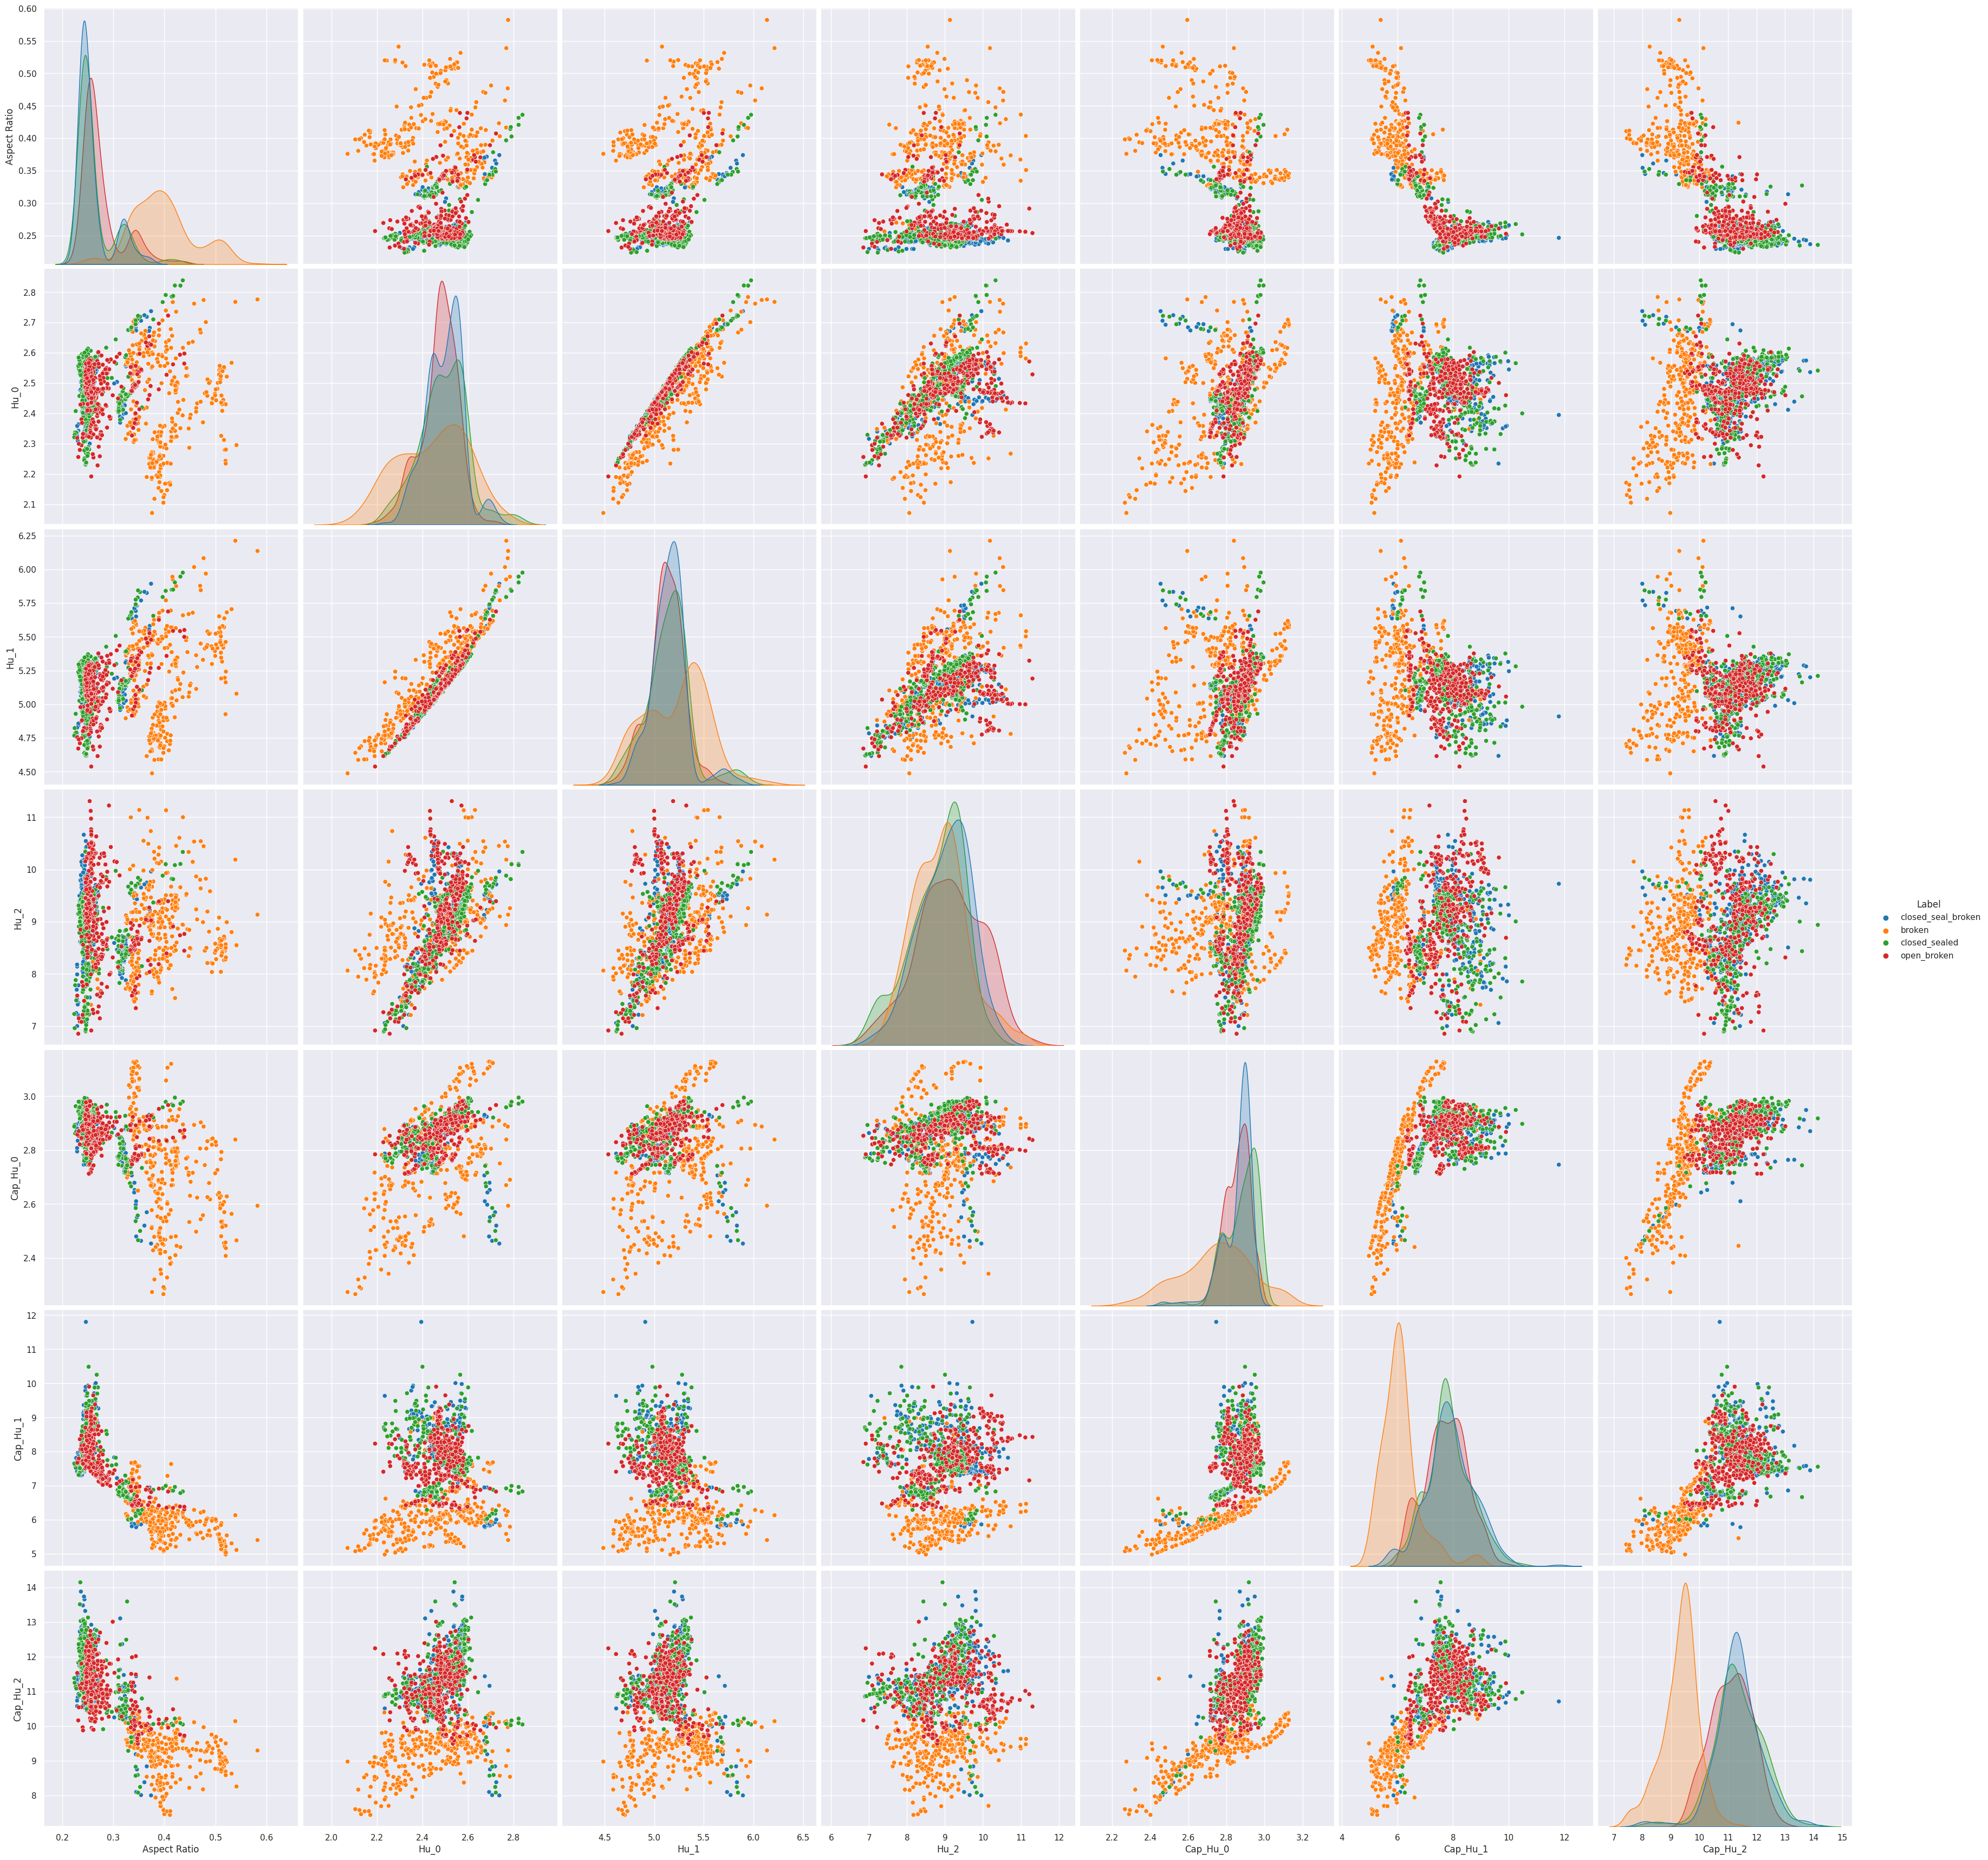

In [2]:
#data.plot.scatter(x='hu0',y='label')

sns.set_theme(style="darkgrid")
plot = sns.pairplot(beer_df, hue ="Label",palette="tab10", height= 5)


In [15]:
# Teilen des Datensatzes in Features und Labels. Hierfür kann die Funktion iloc der Bibliothek Pandas verwendet werden. 

# alles außer die letzte Spalte
#TODO 
data = beer_df.iloc[:,:-1]
#data
# nur die letzte Spalte  
#TODO 
label = beer_df.iloc[:,-1]
label


0       closed_seal_broken
1       closed_seal_broken
2       closed_seal_broken
3       closed_seal_broken
4       closed_seal_broken
               ...        
1311           open_broken
1312           open_broken
1313           open_broken
1314           open_broken
1315           open_broken
Name: Label, Length: 1316, dtype: object

In [16]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=3)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)

In [17]:
# aufteilen des Datensatzes in Train- und Testdaten
from sklearn.model_selection import train_test_split

# aufteilen des Datenstatzes unter verwendung der funktion train_test_split
# TODO 
data_train, data_test, label_train, label_test = train_test_split(data_pca,label, test_size=0.2,
                                                   random_state=42)

print('data_train: ',data_train.shape, 'label_train: ', data_train.shape)
print('data_test: ', data_test.shape, 'label_test: ', data_test.shape)

data_train:  (1052, 3) label_train:  (1052, 3)
data_test:  (264, 3) label_test:  (264, 3)


In [18]:
# Initalisieren des Klassifikators
from sklearn.naive_bayes import GaussianNB # importiere Bayes-Klassifikator
bayes_clf = GaussianNB()# Instazieren des Klassifikators 

# trainieren des Klassifikators mit den Trainingsdaten
#TODO # Wende Klassifikator auf Trainingsdaten an
bayes_clf.fit(data_train,label_train);


In [19]:
# importieren der benötigten Bibliotheken 
from sklearn.metrics import confusion_matrix, classification_report

# Schnelles ausgeben der Accuracy des Klassifikators mit der Funktion .score
# TODO
print("Score ist:" ,bayes_clf.score(data_test, label_test))

#***************************************************************
# Ausgeben der Konfusions Matrix 
# Vorhersagen der Klassen mit dem Testdatensatz mit .predict
# TODO  
y_pred_test = bayes_clf.predict(data_test) #wende Modell (Bayes) auf testdaten an, werden klassifiziert
#Ausgeben einer Konfusionsmatrix mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO
print(confusion_matrix(label_test,y_pred_test)) #vergleiche testdaten mit vorhergesagten Daten

#***************************************************************
# Ausgeben des Classifikation Reports mit den vorhergesagten Werten und den wahren (Testdaten) Werten
# TODO 

print(classification_report(y_pred_test,label_test))

Score ist: 0.5113636363636364
[[60  3  2  5]
 [ 5 44  8  7]
 [ 7 38 11  6]
 [ 9 33  6 20]]
                    precision    recall  f1-score   support

            broken       0.86      0.74      0.79        81
closed_seal_broken       0.69      0.37      0.48       118
     closed_sealed       0.18      0.41      0.25        27
       open_broken       0.29      0.53      0.38        38

          accuracy                           0.51       264
         macro avg       0.50      0.51      0.48       264
      weighted avg       0.63      0.51      0.54       264



In [20]:
from sklearn.decomposition import PCA 

# initialisieren der PCA mit 2 komponenten/features
beer_pca = PCA(n_components=2)

# Bestimmen der Hauptkomponenten
beer_pca.fit(data)

# Transformieren des Datensatzes auf die neuen Features
data_pca = beer_pca.transform(data)